In [1]:
# Import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/user/Desktop/Github/BatiBank_CreditScoring/scripts')
from RFMS_calculator import compute_rfms, classify_users_by_rfms
from WOE_Binning import woe_binning




In [2]:
# Load the data
data = pd.read_csv('C:/Users/user/Desktop/Github/BatiBank_CreditScoring/data/data.csv')  # Assuming you have a transactions.csv file
print(data.head())



         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [3]:
# Step 1: Compute RFMS and classify users
rfms_df = compute_rfms(data)
rfms_df = classify_users_by_rfms(rfms_df)
print(rfms_df.head())



        CustomerId  Recency  Frequency  Monetary  Risk_Label
0     CustomerId_1     2142          1  -10000.0           1
1    CustomerId_10     2142          1  -10000.0           1
2  CustomerId_1001     2148          5   20000.0           1
3  CustomerId_1002     2085         11    4225.0           1
4  CustomerId_1003     2070          6   20000.0           1


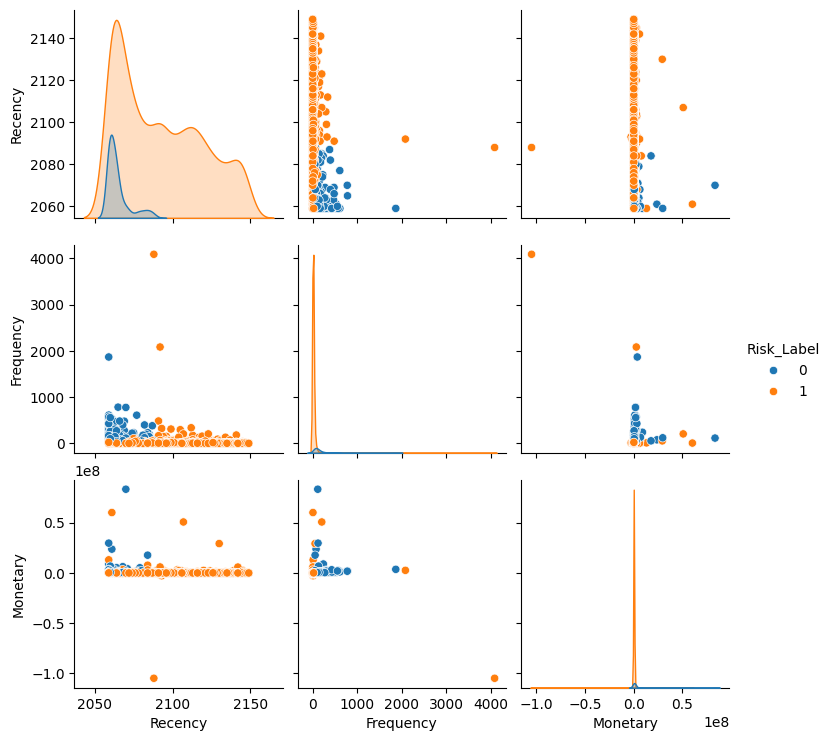

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


     WoE_Recency  WoE_Frequency  WoE_Monetary
0.0     1.341100      -4.875068     -4.194678
1.0     1.314783      -3.828451     -4.110692
2.0     0.845563      -4.290927     -4.376999
3.0    -0.124382      -4.527580     -4.232830
4.0    -0.413880      -4.138873     -3.793371


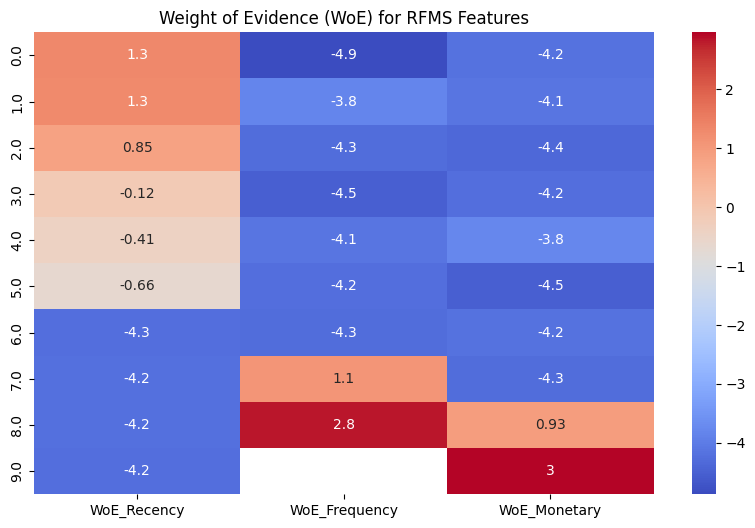

In [4]:
# Step 2: Visualize RFMS features
sns.pairplot(rfms_df, hue='Risk_Label', diag_kind='kde')
plt.show()

# Step 3: Perform WoE binning
woe_df = woe_binning(rfms_df, target='Risk_Label')
print(woe_df.head())

# Visualization of WoE
plt.figure(figsize=(10, 6))
sns.heatmap(woe_df, annot=True, cmap='coolwarm')
plt.title('Weight of Evidence (WoE) for RFMS Features')
plt.show()